In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.pylab import *
import networkx as nx
import pandas as pd
from __future__ import division

In [10]:
import sys
sys.path.append('C:/Users/Lenovo/Desktop/bangladesh_network')

import network_prep as net_p
import network_visualization as net_v
import od_prep as od_p
import weighted_betweenness as betw_w

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.pylab import *
import networkx as nx
import pandas as pd
from __future__ import division

import ema_workbench

import os

In [11]:
# userpath = "D:/Bramka's File/Bangladesh Project/"
# networkfile = 'Data preparation/BGD_road_network/Road_BGD_Class1_2_f_connected_v4.shp'
# centroidfile = 'Data preparation/BGD_Districtdata_Citycentroid/BGD_Districtdata_Citycentroid_level2_v02.shp'
# centroid = userpath+centroidfile
# network = userpath+networkfile
import os
filepath = os.getcwd()
network = filepath+'\\Road_BGD_Class1_2_f_connected_v4.shp'
network = filepath+'\\road_rmms_v9.shp'
centroid = filepath+'\\BGD_Districtdata_Citycentroid_level2_v02.shp'


gdf_points, gdf_node_pos, gdf = net_p.prepare_centroids_network(centroid, network)

In [12]:
#input road class to empty-value edges (additional edges added to complete the network)

# gdf['RD_CLASS'].fillna(2, inplace=True)

# #alter the capacity
# gdf['capacity'] = gdf.RD_CLASS.map(lambda x: 1/x)

# #delete unimportant columns
# del gdf['Class']
# del gdf['Comment']
# del gdf['from']
# del gdf['key']
# del gdf['to']
# del gdf['type']

In [13]:
G2_new = net_p.gdf_to_simplified_multidigraph(gdf_node_pos, gdf, undirected=True)

In [14]:
G2_new_tograph = net_p.multigraph_to_graph(G2_new)

In [15]:
#take the largest components
for g in nx.connected_component_subgraphs(G2_new_tograph):
    if len(list(g.edges())) > 100:
        G3 = g
        
G2_new_tograph = G3.copy()
print(nx.number_connected_components(G2_new_tograph))
nx.info(G2_new_tograph)

1


'Name: \nType: Graph\nNumber of nodes: 1825\nNumber of edges: 2431\nAverage degree:   2.6641'

In [16]:
gdf2 = net_p.graph_to_df(G2_new_tograph)

In [17]:
filepath = os.getcwd()
adm_csv = filepath+'\\District_level_data_v5.csv'
adm_shp = filepath+'\\BGD_adm2.shp'
district_gdf2 = net_p.prepare_adm_background(adm_csv, adm_shp, ['Code', 'Population', 'Population_M',
                                                               'Garment_ton', 'Steel_ton', 'Jute_ton', 'Textile_ton',
                                                               'Rice_ton', 'Wheat_ton', 'Fruits_ton', 'Potatoes_ton',
                                                               'Sugar_ton', 'Bricks_ton', 'RawJute_loc_ton', 'Total_export',
                                                               'Jute_mill', 'Flour_mill', 'Tot_Garment_Factory', 'Household'])

C:\Users\Lenovo\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [18]:
#embed district data to gdf_points

#read district data
district_data = pd.read_csv(adm_csv)

#rename to HASC_2
district_data.rename(columns={'Code':'HASC_2'}, inplace=True)

#merge them
gdf_points = pd.merge(gdf_points,district_data,on='HASC_2',how='outer')

# OD Preparation

In [19]:
centroid_nodes = od_p.prepare_centroids_list(G2_new_tograph)

In [20]:
#export OD
prod_lists = ['Garment_exp_ton', 'Steel_exp_ton', 'Jute_exp_ton', 'Textile_exp_ton', 
              'Rice_exp_ton','Wheat_exp_ton', 'Fruits_exp_ton', 'Potatoes_exp_ton', 'Sugar_exp_ton', 'Bricks_exp_ton']
attr_driver='Total_export'

OD_export_dict = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, attr_driver = attr_driver)

In [21]:
OD_export = OD_export_dict[OD_export_dict.keys()[0]]
for i in range(len(OD_export_dict)-1):
    OD_export = OD_export +  OD_export_dict[OD_export_dict.keys()[i+1]]

In [22]:
#local trade OD

#first for products which attraction is population
prod_lists = ['Garment_loc_ton', 'Steel_loc_ton','Jute_loc_ton',
              'Rice_loc_ton', 'Fruits_loc_ton', 'Potatoes_loc_ton', 'Sugar_loc_ton']
attr_driver='Population_x'
OD_local_dict1 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, attr_driver = attr_driver)

#next for raw jute
prod_lists = ['RawJute_loc_ton']
attr_driver='Jute_mill'
OD_local_dict2 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, attr_driver = attr_driver)

#next for wheat
prod_lists = ['Wheat_loc_ton']
attr_driver='Flour_mill'
OD_local_dict3 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, attr_driver = attr_driver)

#next for textile
prod_lists = ['Textile_loc_ton']
attr_driver='Tot_Garment_Factory'
OD_local_dict4 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, attr_driver = attr_driver)

#last for bricks
prod_lists = ['Bricks_loc_ton']
attr_driver='Household'
OD_local_dict5 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, attr_driver = attr_driver)

In [23]:
OD_local1 = OD_local_dict1[OD_local_dict1.keys()[0]]
for i in range(len(OD_local_dict1)-1):
    OD_local1 = OD_local1 +  OD_local_dict1[OD_local_dict1.keys()[i+1]]
    
OD_local2 = OD_local_dict2[OD_local_dict2.keys()[0]]

OD_local3 = OD_local_dict3[OD_local_dict3.keys()[0]]

OD_local4 = OD_local_dict4[OD_local_dict4.keys()[0]]

OD_local5 = OD_local_dict5[OD_local_dict5.keys()[0]]

OD_local_all= OD_local1 + OD_local2 + OD_local3 + OD_local4 + OD_local5

In [24]:
OD_all = OD_local_all + OD_export

In [25]:
centroid_district_listed = list(OD_all.columns)

In [26]:
OD_unweighted = pd.DataFrame(1, index=centroid_district_listed, columns=centroid_district_listed)

In [27]:
for i,row in OD_unweighted.iterrows():
    OD_unweighted.loc[i][i] = 0

In [28]:
cmap = plt.get_cmap('YlOrRd')
new_cmap = net_v.truncate_colormap(cmap, 0.3, 1)

# Interdiction technique

In [29]:
def shortest_path_record(G, sources, targets, weight):
    '''
    Input:
        G                : Graph Networkx object
        sources, targets : List of nodes sources IDs and nodes targets IDs (e.g. the centroid nodes)
        weight           : Edge data key corresponding to the edge weight
    Output:
        d                : Dict with edge tuple as keys (e.g. (2,3) ) and betweenness value as values
    '''
    d={}
    for i in range(len(sources)):
        source = sources[i]
        for j in range(len(targets)):
            target = targets[j]
            if source != target :
                sp_dijk_all = nx.dijkstra_path(G, source=source, target=target, weight=weight)
                od_pair = str(source)+str(target)
                d[od_pair] = (sp_dijk_all, source, target)
    return d

In [30]:
sp_dict = betw_w.shortest_path_record(G=G2_new_tograph, sources=centroid_nodes, 
                                     targets=centroid_nodes, weight='length')

In [31]:
#NOT NEEDED
def create_distance_matrix(G):
    #create arbitrary empty list to store startnodes and endnodes
    startnodes = []
    endnodes = []
    
    #store all starting nodes and ending nodes of all edges in the graph
    for u,v,data in G.edges(data=True):
        startnodes.append(u)
        endnodes.append(v)
        
    #subset only unique value of each list
    startnodes = list(set(startnodes))
    endnodes = list(set(endnodes))
    
    #create empty dataframe from all starting and ending nodes
    #non-connected nodes should have value of 0 (for calculating total costs later)
    d = pd.DataFrame(0, index=startnodes, columns=endnodes)
    
    #store the length information to the dataframe
    for u,v,data in G.edges(data=True):
        d.loc[u,v] = data['length']
        
    return d

In [32]:
#NOT NEEDED
def total_network_cost(G, sp_dict, dist_matrix, od):
    cost_matrix = pd.DataFrame(0, index=list(dist_matrix.index), columns=list(dist_matrix.columns))
    c = 0
    for key, val in sp_dict.iteritems():
        source = val[1]
        target = val[2]
        sp = val[0]
        flow = od[source][target]
#         print(c)
#         c += 1
        for j in range(len(sp)-1):
            a = sp[j]
            b = sp[j+1]
            if a in list(dist_matrix.index) and b in list(dist_matrix.columns):
                cost_matrix.loc[a,b] = cost_matrix.loc[a,b] + dist_matrix.loc[a,b] * flow
            if b in list(dist_matrix.index) and a in list(dist_matrix.columns):
                cost_matrix.loc[b,a] =  cost_matrix.loc[b,a] + dist_matrix.loc[b,a] * flow
                
    total_cost = cost_matrix.sum().sum()
    return total_cost, cost_matrix

In [33]:
def total_cost_sp(G, sources, targets, weight, od):
    '''
    Input:
        G                : Graph Networkx object
        sources, targets : List of nodes sources IDs and nodes targets IDs (e.g. the centroid nodes)
        weight           : Edge data key corresponding to the edge weight
    Output:
        d                : Dict with edge tuple as keys (e.g. (2,3) ) and betweenness value as values
    '''
    d={}
    total_cost = 0
    for i in range(len(sources)):
        source = sources[i]
        for j in range(len(targets)):
            target = targets[j]
            if source != target :
                sp_dijk_distance = nx.dijkstra_path_length(G, source=source, target=target, weight=weight)
                flow = od[source][target]
                cost = sp_dijk_distance * flow
                total_cost += cost
                tup=tuple([source,target])
                d.update({tup:cost})

    return total_cost, d

In [34]:
import datetime
c = datetime.datetime.now()
total_cost_base, od_cost_dict = total_cost_sp(G=G2_new_tograph, sources=centroid_nodes, targets=centroid_nodes, 
                                weight='length', od = OD_all)
e = datetime.datetime.now()
print(e-c)

0:00:53.217000


In [35]:
def sp_dict_graph_creation(sp_dict, G2_new_tograph):
    edgelist = []
    for edge in list(G2_new_tograph.edges()):
        edgelist.append(edge)
        
    sp_dict_graph = {}
    for key, val in sp_dict.iteritems():
        source = val[1]
        target = val[2]
        tup = tuple([source, target])
        sp_dict_graph.update({tup:[]})
        for j in range(len(val[0])-1):
            test1 = tuple([val[0][j], val[0][j+1]])
            test2 = tuple([val[0][j+1], val[0][j]])
            if test1 in edgelist:
                sp_dict_graph[tup].append(test1)
            if test2 in edgelist:
                sp_dict_graph[tup].append(test2)
    return sp_dict_graph

In [36]:
sp_dict_graph = sp_dict_graph_creation(sp_dict, G2_new_tograph)

In [37]:
od_cost_dict2 = od_cost_dict.copy()

In [40]:
len(od_cost_dict2)

4032

In [47]:
path_in_sp_list = []
for i in sp_dict_graph.iteritems():
    path_in_sp_list += i[1]

In [49]:
path_in_sp_list = list(set(path_in_sp_list))
len(path_in_sp_list)

1095

In [55]:
def interdiction_single_edge(G2_new_tograph, od, weight, od_cost_dict, sp_dict_graph):
    c = 0
    ff = 0
    interdiction_dict = {}
    disconnected_dict = {}
    unsatisfied_demand_dict = {}
    
    
    for i in path_in_sp_list:
        ff += 1
        if ff%200 == 0:
            print(str(ff)+' edges have been interdicted')
        u = i[0]
        v = i[1]
        od_cost_dict2 = od_cost_dict.copy()
        tup = tuple([u,v])
        G = G2_new_tograph.copy()
        G.remove_edge(u,v)
        disconnected = 0
        unsatisfied_demand = 0
        for key, val in sp_dict_graph.iteritems():
            if tup in val:
                try:
                    sp_dijk_distance = nx.dijkstra_path_length(G, source=key[0], target=key[1], weight=weight)
                    flow = od[key[0]][key[1]]
                    cost = sp_dijk_distance * flow
                    od_cost_dict2[key] = cost
                except:
                    sp_dijk_distance = 9999
                    disconnected += 1
                    flow = od[key[0]][key[1]]
                    unsatisfied_demand += flow
        total_cost_new = sum(od_cost_dict2.values())
        cost_increase = (total_cost_new - total_cost_base)/total_cost_base
        unsatisfied_demand = unsatisfied_demand/total_cost_base
        if cost_increase < 0:
            cost_increase = 0
        interdiction_dict.update({tup:cost_increase})
        disconnected_dict.update({tup:disconnected})
        unsatisfied_demand_dict.update({tup:unsatisfied_demand})


    new_interdiction_dict = {}
    for key, val in interdiction_dict.iteritems():
        lst=[key[0], key[1]]
        maxs=max(lst)
        mins=min(lst)
        new_key = str(mins)+str(maxs)
        new_interdiction_dict[new_key] = val
        
    new_disconnected_dict = {}
    for key, val in disconnected_dict.iteritems():
        lst=[key[0], key[1]]
        maxs=max(lst)
        mins=min(lst)
        new_key = str(mins)+str(maxs)
        new_disconnected_dict[new_key] = val
        
    new_unsatisfied_demand_dict = {}
    for key, val in unsatisfied_demand_dict.iteritems():
        lst=[key[0], key[1]]
        maxs=max(lst)
        mins=min(lst)
        new_key = str(mins)+str(maxs)
        new_unsatisfied_demand_dict[new_key] = val
        
    return new_interdiction_dict, new_disconnected_dict, new_unsatisfied_demand_dict

In [56]:
import datetime
timestart = datetime.datetime.now()

new_interdiction_dict, new_disconnected_dict, new_unsatisfied_demand_dict = interdiction_single_edge(G2_new_tograph=G2_new_tograph, 
                                                 od=OD_all, weight='length', 
                                                 od_cost_dict=od_cost_dict, sp_dict_graph=sp_dict_graph)

timeend = datetime.datetime.now()
print(timeend-timestart)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1:18:44.974000


In [57]:
def betweenness_to_df(gdf,betweenness,betweenness_string):
    '''
    Input:
        gdf                : geodataframe of the original network (should contain LineString information)
        betweenness        : dictionary with edge tuple as keys (e.g. (2,3) ) and betweenness value as values
        betweenness_string : string of betweenness dictionary's object name
    Output:
        gdf_final          : updated gdf with additional column of betweenness centrality
        betweenness_df     : betweenness dictionary transformed into dataframe
    '''
    betweenness_df = pd.DataFrame(betweenness.items(), columns=['FromTo', betweenness_string])
    
    c = []
    for i in range(len(gdf)):
        minval = min([gdf['TNODE_'][i],gdf['FNODE_'][i]])
        maxval = max([gdf['TNODE_'][i],gdf['FNODE_'][i]])
        val = str(minval) + str(maxval)
        c.append(val)
    gdf['FromTo'] = c
    
    gdf_final = pd.merge(gdf,betweenness_df,on='FromTo',how='outer')
    
    return gdf_final, betweenness_df

In [85]:
gdf_final, betweenness_df = betweenness_to_df(gdf2,new_interdiction_dict,'Interdiction_Impact')
gdf_final, betweenness_df = betweenness_to_df(gdf_final,new_disconnected_dict,'Disconnected_Pairs')
gdf_final, betweenness_df = betweenness_to_df(gdf_final,new_unsatisfied_demand_dict,'Unsatisfied_Demand(Ton)')

In [102]:
gdf_final = gdf_final.fillna(0)

In [104]:
def plot_network_admcolmap_betweenness_new(gdf, gdf2, colname,betweenness_string,
                                       cmap='OrRd', linewidth=1.25, edgecolor='grey',
                                       maxbetweenness=0, maxpop=0, thres1=60, thres2=90):
    fig, ax = plt.subplots(figsize=(12,9))

    ax.set_aspect('equal')

    valmin1 = min(list(gdf2[betweenness_string]))
    valmax1 = max(list(gdf2[betweenness_string]))
    print(valmin1)
    print(valmax1)

    gdf2.plot(ax=ax, column=betweenness_string, cmap=cmap,vmin=valmin1, vmax=valmax1, linewidth=linewidth)

    #adjust linewidth based on betweenness
    betweenness_list = list(gdf2[betweenness_string])
    #change the linewidth based on the percentile
    betweenness_list = [1 if x < thres1 else 2 if x >= thres1 and x < thres2 else 3 for x in betweenness_list]
    i = 0
    for ln in ax.lines:
        ln.set_linewidth(betweenness_list[i]*1)
        i +=1

    valmin2 = min(list(gdf[colname]))
    valmax2 = max(list(gdf[colname]))
    gdf.plot(ax=ax, column=colname, cmap='Greys',vmin=valmin2, vmax=valmax2, linewidth=0.5, edgecolor=edgecolor, alpha=0.3)

    ax.set_title(colname)
    #remove the lon-lat in the x-y axis of the plot
    ax.axis('off')

    # add colorbar1
    fig = ax.get_figure()
    cax = fig.add_axes([0.85, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap='Greys')
    columnlist = list(gdf[colname])
    columnlist.append(0)
    columnlist.append(maxpop) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label = colname, alpha=0.3)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)

    #add colorbar2
    fig = ax.get_figure()
    cax = fig.add_axes([0.7, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap=cmap)
    columnlist = list(gdf2[betweenness_string])
#     columnlist.append(0)
    columnlist.append(maxbetweenness)
    cbmin, cbmax = min(columnlist), max(columnlist)
#     cbmin, cbmax = round(cbmin,3), round(cbmax,3)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label=betweenness_string)
    poin1 = cbmin+(cbmax-cbmin)/4
    poin2 = cbmin+(cbmax-cbmin)/4*2
    poin3 = cbmin+(cbmax-cbmin)/4*3
#     cbmin = 0
#     cbmax = 0.14
#     poin1 = 0.035
#     poin2 = 0.07
#     poin3 = 0.105
    labels = [cbmin, poin1, poin2, poin3, cbmax]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)

In [105]:
max(new_interdiction_dict.values())

0.13583838420544633

OD_all
0.0
0.135838384205


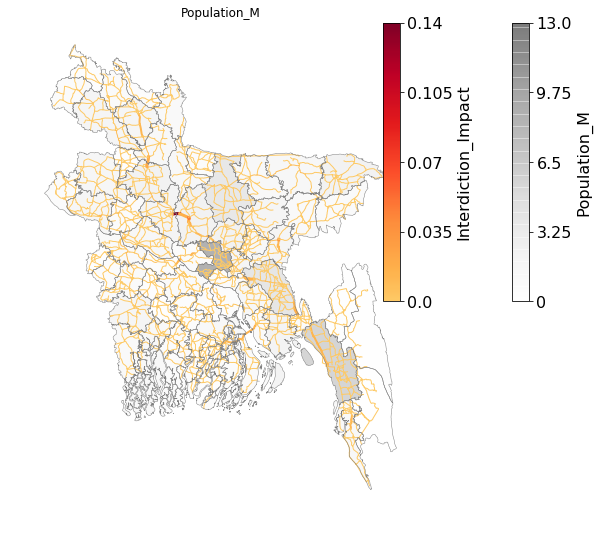

In [106]:
print('OD_all')

plot_network_admcolmap_betweenness_new(gdf=district_gdf2, gdf2=gdf_final, colname='Population_M',
                                       betweenness_string='Interdiction_Impact', cmap=new_cmap,
                                       maxbetweenness=0.14, maxpop=13, thres1=0.01, thres2=0.015)

plt.savefig('interdiction_total_cost.png', dpi=400)

OD_all


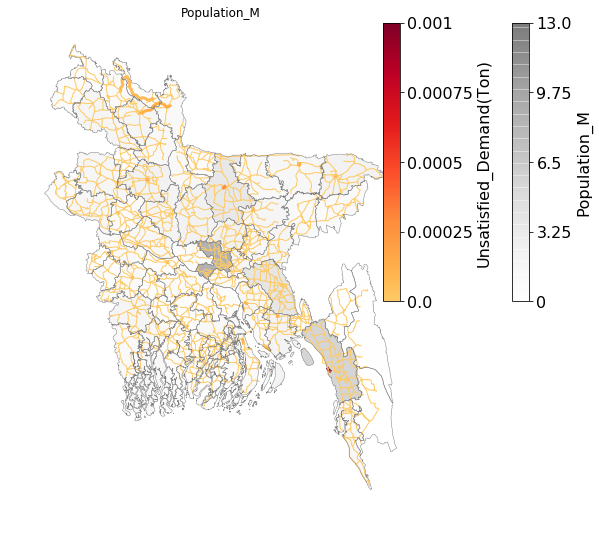

In [109]:
print('OD_all')

net_v.plot_network_admcolmap_betweenness_new(gdf=district_gdf2, gdf2=gdf_final, colname='Population_M',
                                       betweenness_string='Unsatisfied_Demand(Ton)', cmap=new_cmap,
                                       maxbetweenness=0.001, maxpop=13, perc1=0.9, perc2=0.95)

plt.savefig('interdiction_unsatisfied_demand.png', dpi=400)

In [59]:
max(new_interdiction_dict.values())

0.13583838420544633

In [60]:
max(new_unsatisfied_demand_dict.values())

0.00088245553554807917

In [61]:
gdf_final.columns

Index([                 u'FNODE_',              u'IsCentroid',
                        u'TNODE_',                u'avrgLane',
                      u'endChain',                u'geometry',
                        u'length',                 u'maxLane',
                       u'minLane',                 u'motAadt',
                      u'motAadt2',                   u'osmid',
                          u'road',                  u'roadId',
                    u'startChain',               u'truckAadt',
                    u'truckAadt2',                  u'FromTo',
           u'Interdiction_Impact',      u'Disconnected_Pairs',
       u'Unsatisfied_Demand(Ton)'],
      dtype='object')

In [110]:
gdf_final2 = gdf_final[['geometry', 'road', 'roadId', 'Interdiction_Impact', 'Disconnected_Pairs', 'Unsatisfied_Demand(Ton)']]

In [113]:
gdf_final2.head()

,geometry,road,roadId,intrTot,intrDc,intrDDem
0,LINESTRING (90.34726399799305 23.7829689382126...,N5,999990,0.000304,0.0,0.0
1,"LINESTRING (90.4353608 23.7021389, 90.45249967...",R110,999999,0.000012,0.0,0.0
2,LINESTRING (90.45139256802021 23.7023327580832...,N1,999999,0.000185,0.0,0.0
3,"LINESTRING (90.4353608 23.7021389, 90.432416 2...",N8,10001,0.000208,0.0,0.0
4,"LINESTRING (90.51341670000001 23.7249438, 90.5...",N2,10011,0.000062,0.0,0.0


In [71]:
gdf_final2.to_csv('criticality_result_v01b.csv')

In [112]:
gdf_final2.columns = ['geometry', 'road', 'roadId', 'intrTot', 'intrDc', 'intrDDem']

In [114]:
gdf_final2.crs = {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84'}

In [115]:
import os
folder = 'C:\Users\Lenovo\Desktop\Deliverable 9 Dec\00 on progress\create shp from RMMS'
folder = 'C:\Users\Lenovo\Desktop\Deliverable 9 Dec'
ws = folder
temp_shp = os.path.join(ws,"road_criticality_v01b.shp")
gdf_final2.to_file(filename=temp_shp,driver='ESRI Shapefile')

In [39]:
def plot_network_admcolmap_betweenness(gdf,gdf2, colname,betweenness_string,
                                       cmap='OrRd', linewidth=1.25, edgecolor='grey',
                                       maxbetweenness=0, maxpop=0):
    fig, ax = plt.subplots(figsize=(12,9))
    
    ax.set_aspect('equal')

    valmin1 = min(list(gdf2[betweenness_string]))
    valmax1 = max(list(gdf2[betweenness_string]))
    gdf2.plot(ax=ax, column=betweenness_string, cmap=cmap,vmin=valmin1, vmax=valmax1, linewidth=linewidth)
    
    #adjust linewidth based on betweenness
    betweenness_list = list(gdf2[betweenness_string])
    #change small betweenness values to 0.1 so that they are still visible in the figure
    betweenness_list = [1 if x < 0.02 else 2.5 if x >= 0.02 and x < 0.05 else 3 for x in betweenness_list]
    i = 0
    for ln in ax.lines:
        ln.set_linewidth(betweenness_list[i]*1)
        ln.set_linewidth(betweenness_list[i])
        i +=1
    
    valmin2 = min(list(gdf[colname]))
    valmax2 = max(list(gdf[colname]))
    gdf.plot(ax=ax, column=colname, cmap='Greys',vmin=valmin2, vmax=valmax2, linewidth=0.5, edgecolor=edgecolor, alpha=0.3)
    
    ax.set_title(colname)
    #remove the lon-lat in the x-y axis of the plot
    ax.axis('off')

    # add colorbar1
    fig = ax.get_figure()
    cax = fig.add_axes([0.85, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap='Greys')
    columnlist = list(gdf[colname])
    columnlist.append(0)
    columnlist.append(maxpop) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label = colname, alpha=0.3)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)
    
    #add colorbar2
    fig = ax.get_figure()
    cax = fig.add_axes([0.7, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap=cmap)
    columnlist = list(gdf2[betweenness_string])
    columnlist.append(0)
    columnlist.append(maxbetweenness)
#     columnlist.append(0.3) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    cbmin, cbmax = round(cbmin,3), round(cbmax,3)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label=betweenness_string)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)

new


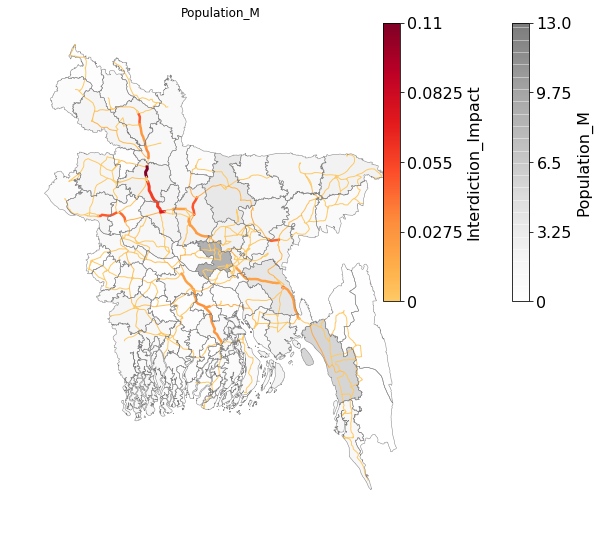

In [41]:
print('new')
plot_network_admcolmap_betweenness(gdf=district_gdf2, gdf2=gdf_final,cmap=new_cmap, 
                                   betweenness_string='Interdiction_Impact',colname='Population_M', linewidth=1,
                                  maxbetweenness=0.11, maxpop=13)

In [65]:
unsatisfied_demand={}
for key, val in new_unsatisfied_demand_dict.iteritems():
    newval = val/OD_all.sum().sum()*100
    unsatisfied_demand.update({key:newval})

In [66]:
max(unsatisfied_demand.values())

23.224402779385777

In [67]:
gdf_final, betweenness_df = betweenness_to_df(gdf2,unsatisfied_demand,'unsatisfied_demand(%)')

In [68]:
def plot_network_admcolmap_betweenness(gdf,gdf2, colname,betweenness_string,
                                       cmap='OrRd', linewidth=1.25, edgecolor='grey',
                                       maxbetweenness=0, maxpop=0):
    fig, ax = plt.subplots(figsize=(12,9))
    
    ax.set_aspect('equal')

    valmin1 = min(list(gdf2[betweenness_string]))
    valmax1 = max(list(gdf2[betweenness_string]))
    gdf2.plot(ax=ax, column=betweenness_string, cmap=cmap,vmin=valmin1, vmax=valmax1, linewidth=linewidth)
    
    #adjust linewidth based on betweenness
    betweenness_list = list(gdf2[betweenness_string])
    #change small betweenness values to 0.1 so that they are still visible in the figure
    betweenness_list = [1 if x < 10 else 2.5 if x >= 10 and x < 20 else 3 for x in betweenness_list]
    i = 0
    for ln in ax.lines:
        ln.set_linewidth(betweenness_list[i]*1)
        ln.set_linewidth(betweenness_list[i])
        i +=1
    
    valmin2 = min(list(gdf[colname]))
    valmax2 = max(list(gdf[colname]))
    gdf.plot(ax=ax, column=colname, cmap='Greys',vmin=valmin2, vmax=valmax2, linewidth=0.5, edgecolor=edgecolor, alpha=0.3)
    
    ax.set_title(colname)
    #remove the lon-lat in the x-y axis of the plot
    ax.axis('off')

    # add colorbar1
    fig = ax.get_figure()
    cax = fig.add_axes([0.85, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap='Greys')
    columnlist = list(gdf[colname])
    columnlist.append(0)
    columnlist.append(maxpop) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label = colname, alpha=0.3)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)
    
    #add colorbar2
    fig = ax.get_figure()
    cax = fig.add_axes([0.7, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap=cmap)
    columnlist = list(gdf2[betweenness_string])
    columnlist.append(0)
    columnlist.append(maxbetweenness)
#     columnlist.append(0.3) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    cbmin, cbmax = round(cbmin,3), round(cbmax,3)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label=betweenness_string)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)

In [ ]:
print('new')
plot_network_admcolmap_betweenness(gdf=district_gdf2, gdf2=gdf_final,cmap=new_cmap, 
                                   betweenness_string='unsatisfied_demand(%)',colname='Population_M', linewidth=1,
                                  maxbetweenness=0.1, maxpop=13)

new


In [53]:
def plot_network_admcolmap_betweenness(gdf,gdf2, colname,betweenness_string,
                                       cmap='OrRd', linewidth=1.25, edgecolor='grey',
                                       maxbetweenness=0, maxpop=0):
    fig, ax = plt.subplots(figsize=(12,9))
    
    ax.set_aspect('equal')

    valmin1 = min(list(gdf2[betweenness_string]))
    valmax1 = max(list(gdf2[betweenness_string]))
    gdf2.plot(ax=ax, column=betweenness_string, cmap=cmap,vmin=valmin1, vmax=valmax1, linewidth=linewidth)
    
    #adjust linewidth based on betweenness
    betweenness_list = list(gdf2[betweenness_string])
    #change small betweenness values to 0.1 so that they are still visible in the figure
    betweenness_list = [1 if x < 50 else 2.5 if x >= 50 and x < 200 else 3 for x in betweenness_list]
    i = 0
    for ln in ax.lines:
        ln.set_linewidth(betweenness_list[i]*1)
        ln.set_linewidth(betweenness_list[i])
        i +=1
    
    valmin2 = min(list(gdf[colname]))
    valmax2 = max(list(gdf[colname]))
    gdf.plot(ax=ax, column=colname, cmap='Greys',vmin=valmin2, vmax=valmax2, linewidth=0.5, edgecolor=edgecolor, alpha=0.3)
    
    ax.set_title(colname)
    #remove the lon-lat in the x-y axis of the plot
    ax.axis('off')

    # add colorbar1
    fig = ax.get_figure()
    cax = fig.add_axes([0.85, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap='Greys')
    columnlist = list(gdf[colname])
    columnlist.append(0)
    columnlist.append(maxpop) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label = colname, alpha=0.3)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)
    
    #add colorbar2
    fig = ax.get_figure()
    cax = fig.add_axes([0.7, 0.45, 0.02, 0.43])
    sm = plt.cm.ScalarMappable(cmap=cmap)
    columnlist = list(gdf2[betweenness_string])
    columnlist.append(0)
    columnlist.append(maxbetweenness)
#     columnlist.append(0.3) #hardcoded, not good
    cbmin, cbmax = min(columnlist), max(columnlist)
    cbmin, cbmax = round(cbmin,3), round(cbmax,3)
    sm.set_array(columnlist)
    cb = plt.colorbar(sm, cax=cax, label=betweenness_string)
    labels = [0, cbmax/4, cbmax/4*2, cbmax/4*3, cbmax/4*4]
    loc = labels
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    cb.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=16))
    cb.ax.tick_params(labelsize=16)

new


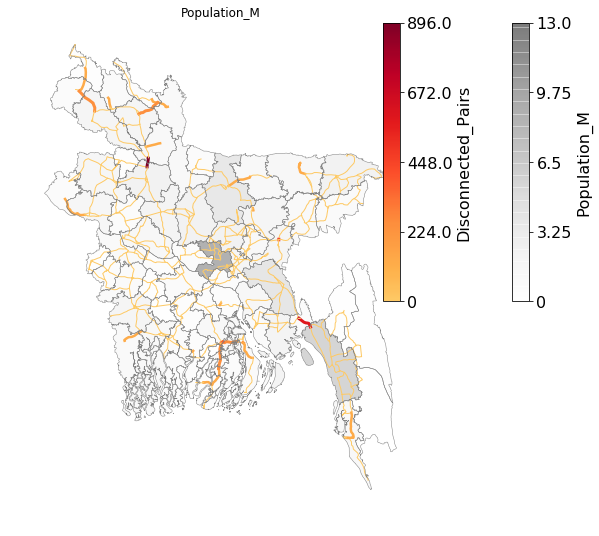

In [54]:
print('new')
plot_network_admcolmap_betweenness(gdf=district_gdf2, gdf2=gdf_final,cmap=new_cmap, 
                                   betweenness_string='Disconnected_Pairs',colname='Population_M', linewidth=1,
                                  maxbetweenness=0.1, maxpop=13)

In [55]:
new_unsatisfied_demand_dict

{'010': 0,
 '02791': 0,
 '101104': 0,
 '101107': 0,
 '10131016': 0,
 '10132329': 0,
 '10132519': 4416339.6655609114,
 '10161031': 0,
 '10161125': 1959660.659062187,
 '10251028': 0,
 '10253790': 0,
 '10281047': 0,
 '10282499': 0,
 '10311053': 0,
 '104118': 0,
 '10471050': 0,
 '10501053': 0,
 '10531057': 773435.46684332564,
 '107124': 0,
 '10722572': 0,
 '10725272': 0,
 '10781114': 0,
 '10782531': 0,
 '10941132': 0,
 '10941157': 0,
 '10942572': 0,
 '11011185': 0,
 '11012524': 1185265.9074530865,
 '11141136': 0,
 '11143903': 0,
 '11252647': 721341.09483446355,
 '11321134': 0,
 '11321136': 0,
 '11341136': 0,
 '11341143': 0,
 '11431178': 0,
 '11431190': 0,
 '11571178': 0,
 '1161461': 1923640.981233886,
 '1162903': 1923640.981233886,
 '11691172': 721341.09483446355,
 '11692647': 721341.09483446355,
 '11725440': 0,
 '11782661': 0,
 '1181470': 0,
 '118189': 0,
 '1182933': 0,
 '11851185': 0,
 '11902661': 0,
 '11902684': 0,
 '12021210': 1488074.276864788,
 '12022661': 0,
 '12022788': 0,
 '120812